Eigenvalue  1  =  2.80642553931667  Explains  40.091793418809566 % of the variance
Eigenvalue  2  =  0.9330175172593884  Explains  13.32882167513412 % of the variance
Eigenvalue  3  =  0.7825671954869758  Explains  11.179531364099656 % of the variance
Eigenvalue  4  =  0.7408897605084542  Explains  10.584139435835061 % of the variance
Eigenvalue  5  =  0.703521753726889  Explains  10.050310767526986 % of the variance
Eigenvalue  6  =  0.5960544559354093  Explains  8.515063656220132 % of the variance
Eigenvalue  7  =  0.43752377776621537  Explains  6.250339682374505 % of the variance
Cp. 1 of 1st Eigenvector =  -0.4516974323107351  Cp. 1 of 2nd Eigenvector =  0.05264008297653607
Cp. 2 of 1st Eigenvector =  -0.3869869462681054  Cp. 2 of 2nd Eigenvector =  0.33046863251327235
Cp. 3 of 1st Eigenvector =  -0.31526278751260495  Cp. 3 of 2nd Eigenvector =  0.3911958130411162
Cp. 4 of 1st Eigenvector =  -0.44052940939804963  Cp. 4 of 2nd Eigenvector =  -0.10344724333370868
Cp. 5 of 1st Eigenve

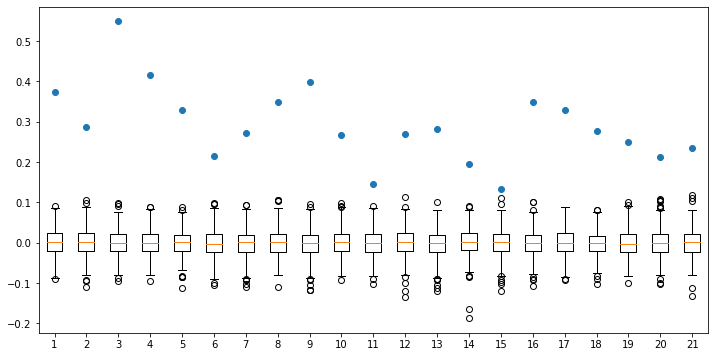

In [28]:
#!/usr/bin/python3.7
#Case_Study4.py
#Parth Parakh
#purpose: Correlation-Analysis (PCA)

# The file loaded here is a 7x929 matrix where each row corresponds to
# 929 daily returns of a different cryptocurrency, ending in February
# 2018

# Row 1: Bitcoin
# Row 2: Dash
# Row 3: Ethereum
# Row 4: Litecoin
# Row 5: Monero
# Row 6: Nem
# Row 7: Ripple
#---------------------------------------------------------------------
#import modules
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
#----------------------------------------------------------------------
#helper functions

def readFile(fileName):
    with open(fileName) as f:
        reader = csv.reader(f, delimiter="\t")
        d = list(reader)
    return d
        
if __name__ == '__main__':
    file = readFile("cryptocurrency_prices.txt")
    data = (file)
    b = data[0]
    
    N = len(data) # Number of crypto currencies
    T = len(data[0])-1 # Number of time steps in returns


    R = np.zeros((N, T)) # Matrix de returns de 7 X 928
    for j in range(N):
        b = data[j]

        # Log-returns
        for i in range(len(b)-1):
            den = float(b[i])
            num = float(b[i+1])
            R[j][i] = np.log(num/den)
            
    #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    #%% Building correlation matrix %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    
    X = np.zeros((N, T))
    for i in range(N):
        X[i] = (R[i]-np.mean(R[i]))/(np.std(R[i]))
    
    C = np.corrcoef(R); #%%% Correlation matrix 
    
    #print(np.shape(X))
    
    #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    #%%% Testing statistical significance of correlations %%%%%%%%%%%%%%%%%%%%%%
    #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    

    # We will shuffle the order of each time series and check correlations between them, to see if the correlations
    # Above are significant or not
    
    triang = int(((N*N)-N)/2)

    values_C = np.zeros(triang)
    count = 0
    for j in range(N):
        for h in range(j+1,N):
            values_C[count] = C[j][h]
            count = count+1

    Nsamples = 500 # Number of shuffles
    X_shuff = np.zeros((N, T))

    triang = int(((N*N)-N)/2)
    values = np.zeros((triang, Nsamples)) 

    for k in range(Nsamples):
        for i in range(N):
            rand = X[i][np.random.permutation(T)] 
            X_shuff[i] = rand

        C_shuff = np.corrcoef(X_shuff)

        count = 0
        for j in range(N):
            for h in range(j+1,N):
                values[count][k] = C_shuff[j][h]
                count = count+1


    x = np.arange(triang)+1
    plt.figure(figsize=(12,6))
    plt.boxplot(np.transpose(values[:]))
    plt.plot(x,values_C,"o")
    
    #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    #%%% Principal component analysis (PCA) %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    #%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

    #%%% Eigenvalues and eigenvectors: in the commands below L is a diagonal
    #%%% matrix with the eigenvalues of C on the main diagonal, which are then
    #%%% extracted as a vector with the command diag. V is the NxN matrix of the
    #%%% eigenvectors: its n-th column is the eigenvector of the n-th eigenvalue

    L, V = LA.eig(C)
    #L = np.sort(L)[::-1]
    sorted_ind = np.argsort(L)
    sorted_ind = np.flip(sorted_ind) # porque los queremos en descending order

    L = L[sorted_ind]
    V = np.transpose(V)
    V = V[sorted_ind]
    
    for i in range(N):
        print("Eigenvalue ", i+1," = ", L[i], " Explains ", L[i]/N*100, "% of the variance");
        
    for i in range(N):
        print("Cp.", i+1, "of 1st Eigenvector = ", V[0][i]," Cp.", i+1, "of 2nd Eigenvector = ", V[1][i])
        
    E = np.zeros((N, T))
    #for i in range(N):
        #E[i] = np.sum(V[:][i]*X)/np.sqrt(L[i])


    for k in range(N):
        for j in range(T):
            for i in range(N):
                E[k][j] = E[k][j] + V[k][i]*X[i][j] 

    for i in range(N):
        E[i][:] = E[i][:]/np.sqrt(L[i])
        
    C_E = np.corrcoef(E)
    for i in range(len(C_E)):
        for j in range(len(C_E)):
            #print(C_E[i][j], " to >>>", int(C_E[i][j]))
            C_E[i][j] = int(C_E[i][j])
    print(C_E)